In [1]:
#import relevant libraries
#Load modules
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import dabest
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from tqdm import tqdm
from time import sleep
import plotly.graph_objects as go
from scipy.signal import find_peaks
from numpy import genfromtxt
from scipy import fftpack
import scipy.stats as stats
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope
import scipy 
from struct import *
import math
import osar
import sys
import glob
import scipy as sp
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import re
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)

In [2]:
def meandiffchart(dfi, basegenotype, parameter):
    
    dfr1 = pd.DataFrame()
    for names in basegenotype:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['Repeats'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[(dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    test = dabest.load(dfr1, idx=titlelst)
    tab1 = test.mean_diff.statistical_tests
    tab1['difference'] = round(tab1['difference'],3)
    tab = pd.concat([tab1['test'], tab1['difference']], axis=1)
    
    genot = dfi['MBON'].unique().tolist()
    
    tab.rename(columns = {'test':'MBON > ' + str(genot), 'difference':parameter}, inplace = True)

    return tab

## __COMPUTER TYPE__

In [43]:
typeo = "C:\\Users\\user\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\Technical repeats\\Chrimson2\\"

genot = "MB434B x Chrimson2"

typeob = typeo + genot + "\\"
# typeob2 = typeo + genot2 + "\\"

## __NEW DATA SET__

In [44]:
#nicole's data (only run if no comp set)
root = typeob
startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
afterpass = []
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x )', (os.path.split(dir1)[1])).group(0))
    afterpass.append(re.search(r'(?<=_).*', (os.path.split(dir1)[1])).group(0))
            
dfs=[]

for loc,name, n in zip(baseDirectory,basegenotype, afterpass):
    testing = pd.DataFrame()
    testing = osar.osar(loc,driver = name).results
    testing['Repeats'] = n
    dfs.append(testing)


Creating borders for each fly...
Done.

Processing CSV 24 of 24
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 4 of 4
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 4 of 4
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 4 of 4
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 4 of 4
Summarising results for all flies...
All done.


In [45]:
df=pd.concat(dfs)

In [41]:
# df=pd.concat(dfs)
# filepath = typeo + str(genot) + "_technicalrepeat.csv"
# #filepath = typeo + "FarhanChrimson2compilation.csv"
# df.to_csv(filepath)


## __RUN THIS IF OLD DATA SET__

In [46]:
# filepath = typeo + str(genot) + "_technicalrepeat.csv"
# dff= pd.read_csv(filepath)
dff= df.copy()
basegenotypeF = dff['Repeats'].unique()

basegenotypeF

array(['2022-03-21-1', '2022-03-25-1', '2022-03-28-1', '2022-05-09-1',
       '2022-08-10-1'], dtype=object)

In [47]:
def makingof(df2, matchlist):
    dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
    dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
    dfi.rename(columns={'driver': 'MBON'}, inplace = True)
    parameter = 'pi_smoothed_Pattern 01'
    dfr1 = pd.DataFrame()
        
    for names in matchlist:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['Repeats'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[dfi['status'] == 'Sibling'].copy().reset_index(drop=True)
        
        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]    

    valencemd = meandiffchart(dfi, matchlist, 'pi_smoothed_Pattern 01')
    srmd = meandiffchart(dfi, matchlist, 'log2_speed_ratio_Pattern 01')
    dfrtest = dfr1.copy()
    valencemd2 = valencemd.sort_values('pi_smoothed_Pattern 01').reset_index(drop=True)
    sorter = []
    for n in valencemd2.iloc[:,0]:
        sorter.append(n)

    inverteddx = dict(titlelst)
    dx = dict([(value, key) for key, value in inverteddx.items()])
    sortedDict = list(map(lambda yVal: dx[yVal], sorter))
    vvv = list(zip(sortedDict, sorter))
    
    test = dabest.load(dfr1, idx=vvv, ci=90)
    
    return test

In [48]:
df2 = dff.copy()


dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)
parameter = 'pi_smoothed_Pattern 01'
dfr1 = pd.DataFrame()   
    
for names in basegenotypeF:
    dfrr = pd.DataFrame()
    filter1 = dfi[(dfi['Repeats'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
    filter2 = dfi[dfi['status'] == 'Sibling'].copy().reset_index(drop=True)
    
    dfrr[names + " Cntrl" ] = filter2[parameter]
    dfrr[names] = filter1[parameter]
    dfr1 = pd.concat([dfr1, dfrr], axis = 1)
l = dfr1.columns.tolist()
titlelst = list(zip(l,l[1:]))[::2]    

valencemd = meandiffchart(dfi, basegenotypeF, 'pi_smoothed_Pattern 01')
# srmd = meandiffchart(dfi, basegenotypeF, 'log2_speed_ratio_Pattern 01')
# dfrtest = dfr1.copy()
valencemd2 = valencemd.sort_values('pi_smoothed_Pattern 01').reset_index(drop=True)
sorter = []
for n in valencemd2.iloc[:,0]:
    sorter.append(n)

inverteddx = dict(titlelst)
dx = dict([(value, key) for key, value in inverteddx.items()])
sortedDict = list(map(lambda yVal: dx[yVal], sorter))
vvv = list(zip(sortedDict, sorter))

test = dabest.load(dfr1, idx=vvv, ci=90)



C:\Users\user\AppData\Local\Temp\ipykernel_24496\2454194355.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab1['difference'] = round(tab1['difference'],3)


In [49]:
totaltest = pd.DataFrame()
totaltest['Date'] = test.mean_diff.statistical_tests.test
totaltest['diff'] = round(test.mean_diff.statistical_tests.difference, 3)

totaltest

,Date,diff
0,2022-03-25-1,-0.376
1,2022-05-09-1,-0.229
2,2022-03-21-1,-0.156
3,2022-08-10-1,-0.136
4,2022-03-28-1,-0.084


c:\Users\user\anaconda3\lib\site-packages\dabest\plotter.py:563: UserWarning: FixedFormatter should only be used together with FixedLocator
  rawdata_axes.set_xticklabels(ticks_with_counts)


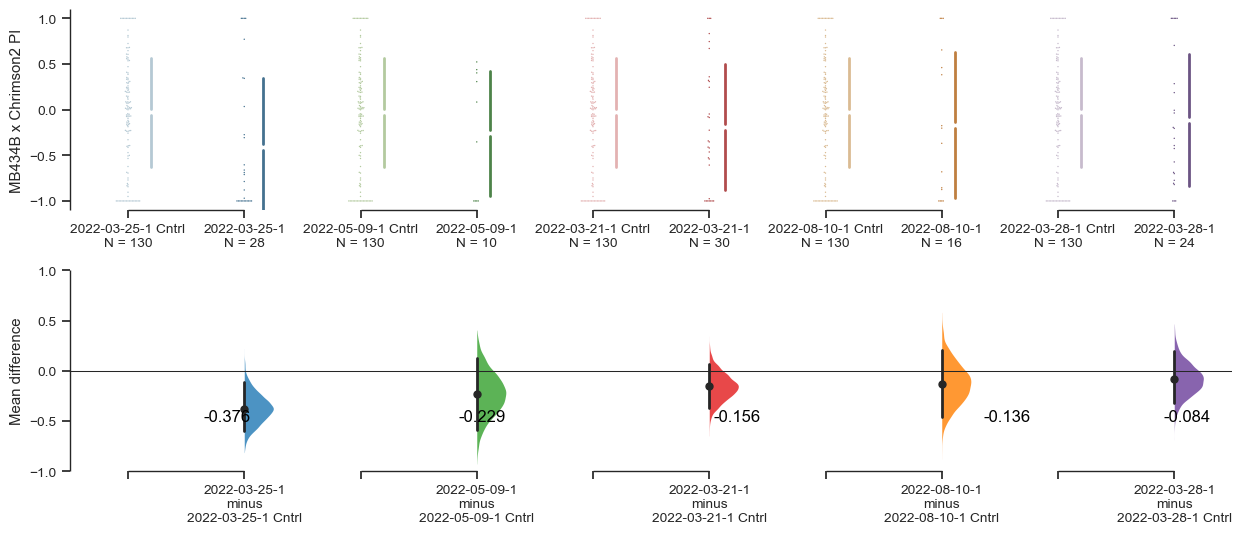

In [51]:
import seaborn as sns

plooter = test.mean_diff.plot(swarm_label= genot + " PI" , float_contrast=False, raw_marker_size=1, es_marker_size=5, custom_palette="Paired", contrast_ylim=(-1,1)); 

#n_df.mean_diff.plot(swarm_label="PI of Nicole's data" , float_contrast=False, raw_marker_size=1, es_marker_size=5, custom_palette="Paired", contrast_ylim=(-1,1), ax=axx.flat[1]); 
plooter.text(0.23, 0.20, str(totaltest['diff'][0]), fontsize = 12, color = "black", ha = "center", va = "center") 
plooter.text(0.40, 0.20, str(totaltest['diff'][1]), fontsize = 12, color = "black", ha = "center", va = "center") 
plooter.text(0.57, 0.20, str(totaltest['diff'][2]), fontsize = 12, color = "black", ha = "center", va = "center") 
plooter.text(0.75, 0.20, str(totaltest['diff'][3]), fontsize = 12, color = "black", ha = "center", va = "center") 
plooter.text(0.87, 0.20, str(totaltest['diff'][4]), fontsize = 12, color = "black", ha = "center", va = "center") 
# plooter.text(0.85, 0.20, str(totaltest['diff'][5]), fontsize = 12, color = "black", ha = "center", va = "center") 
# plooter.text(0.80, 0.20, str(totaltest['diff'][6]), fontsize = 12, color = "black", ha = "center", va = "center") 
# plooter.text(0.90, 0.20, str(totaltest['diff'][7]), fontsize = 12, color = "black", ha = "center", va = "center") 
#plooter.text(0.87, 0.20, str(totaltest['diff'][8]), fontsize = 12, color = "black", ha = "center", va = "center") 


#plooter.text(0.85, 0.20, str(totaltest['diff'][5]), fontsize = 12, color = "black", ha = "center", va = "center") 

sns.set(font_scale=0.9)

In [11]:
totalmd = pd.DataFrame()
totalmd['MBON'] = f_df.mean_diff.statistical_tests.test
totalmd['Farhan_PI'] = round(f_df.mean_diff.statistical_tests.difference, 3)
totalmd['Nicole PI'] = round(n_df.mean_diff.statistical_tests.difference,3)
totalmd['difference'] = round(totalmd['Farhan_PI'] - totalmd['Nicole PI'], 3)
totalmd

,MBON,Farhan_PI,Nicole PI,difference
0,VT999036,-0.578,-0.373,-0.205
1,MB077B,-0.102,-0.116,0.014
2,R76B09,-0.052,0.002,-0.054
3,MB093C,0.011,0.034,-0.023
4,MB112C,0.443,0.199,0.244


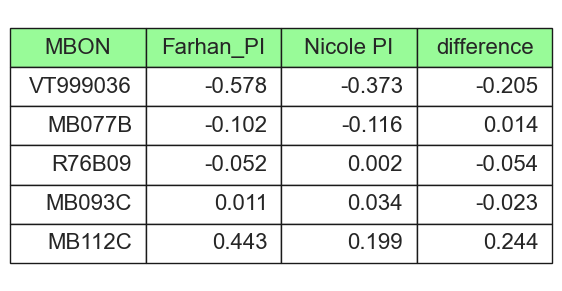

In [12]:
fig, ax = plt.subplots(figsize = (3, 3))

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

totalmd2 = totalmd
tablele = ax.table(cellText=totalmd2.values, colLabels=totalmd2.columns, colColours = ["palegreen"] * 10, loc='center')

fig.tight_layout()
tablele.scale(2, 2)
tablele.set_fontsize(16)